#  Import

In [1]:
import gdown
import scanpy as sc
import scarches as sca
from scarches.dataset.trvae.data_handling import remove_sparsity
from classifiers.classifiers import Classifiers

/usr/local/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/usr/local/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
 captum (see https://github.com/pytorch/captum).


#  Download reference dataset to create a model with latent representation

You can skip to the classifier step if you have a trained model and the latent representation of the reference atlas already

In [2]:
condition_key = 'study'
cell_type_key = 'cell_type'
target_conditions = ['Pancreas CelSeq2', 'Pancreas SS2']

# url = 'https://drive.google.com/uc?id=1ehxgfHTsMZXy6YzlFKGJOsBKQ5rrvMnd'
# output = 'pancreas.h5ad'
# gdown.download(url, output, quiet=False)

adata_all = sc.read_h5ad('pancreas.h5ad')

adata = adata_all.raw.to_adata()
adata = remove_sparsity(adata)
source_adata = adata[~adata.obs[condition_key].isin(target_conditions)].copy()
target_adata = adata[adata.obs[condition_key].isin(target_conditions)].copy()

In [3]:
source_adata

AnnData object with n_obs × n_vars = 10294 × 1000
    obs: 'batch', 'study', 'cell_type', 'size_factors'

In [4]:
target_adata

AnnData object with n_obs × n_vars = 5387 × 1000
    obs: 'batch', 'study', 'cell_type', 'size_factors'

# Create SCVI model and train it on reference dataset

In [5]:
sca.models.SCVI.setup_anndata(source_adata, batch_key=condition_key)

vae = sca.models.SCVI(
    source_adata,
    n_layers=2,
    encode_covariates=True,
    deeply_inject_covariates=False,
    use_layer_norm="both",
    use_batch_norm="none",
)

vae.train(
    max_epochs=5
)

vae.save(dir_path="model/", overwrite=True)

/usr/local/lib/python3.10/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Epoch 1/5:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/usr/local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 2/5:  20%|██        | 1/5 [00:04<00:16,  4.15s/it, v_num=1, train_loss_step=584, train_loss_epoch=784]

/usr/local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/usr/local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 3/5:  40%|████      | 2/5 [00:07<00:11,  3.95s/it, v_num=1, train_loss_step=610, train_loss_epoch=625]

/usr/local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/usr/local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 4/5:  60%|██████    | 3/5 [00:11<00:07,  3.80s/it, v_num=1, train_loss_step=641, train_loss_epoch=580]

/usr/local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/usr/local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 5/5:  80%|████████  | 4/5 [00:15<00:03,  3.77s/it, v_num=1, train_loss_step=493, train_loss_epoch=560]

/usr/local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/usr/local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 5/5: 100%|██████████| 5/5 [00:18<00:00,  3.71s/it, v_num=1, train_loss_step=620, train_loss_epoch=548]

INFO: `Trainer.fit` stopped: `max_epochs=5` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:18<00:00,  3.78s/it, v_num=1, train_loss_step=620, train_loss_epoch=548]


# Create anndata file of latent representation

In [6]:
reference_latent = sc.AnnData(vae.get_latent_representation())
reference_latent.obs["cell_type"] = source_adata.obs[cell_type_key].tolist()
reference_latent.obs["batch"] = source_adata.obs[condition_key].tolist()

# Perform surgery on reference model and train on query dataset

In [7]:
model = sca.models.SCVI.load_query_data(
    target_adata,
    "model/",
    freeze_dropout = True,
)

model.train(max_epochs=5, plan_kwargs=dict(weight_decay=0.0))

query_latent = sc.AnnData(model.get_latent_representation())
query_latent.obs['cell_type'] = target_adata.obs[cell_type_key].tolist()
query_latent.obs['batch'] = target_adata.obs[condition_key].tolist()

INFO     File model/model.pt already downloaded                                                                    


/usr/local/lib/python3.10/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Epoch 1/5:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/usr/local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 2/5:  20%|██        | 1/5 [00:01<00:05,  1.42s/it, v_num=1, train_loss_step=1.14e+3, train_loss_epoch=1.2e+3]

/usr/local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/usr/local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 3/5:  40%|████      | 2/5 [00:02<00:04,  1.43s/it, v_num=1, train_loss_step=1.23e+3, train_loss_epoch=1.19e+3]

/usr/local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/usr/local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 4/5:  60%|██████    | 3/5 [00:04<00:02,  1.42s/it, v_num=1, train_loss_step=1.18e+3, train_loss_epoch=1.19e+3]

/usr/local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/usr/local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 5/5:  80%|████████  | 4/5 [00:05<00:01,  1.44s/it, v_num=1, train_loss_step=1.21e+3, train_loss_epoch=1.18e+3]

/usr/local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/usr/local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 5/5: 100%|██████████| 5/5 [00:07<00:00,  1.43s/it, v_num=1, train_loss_step=1.21e+3, train_loss_epoch=1.18e+3]

INFO: `Trainer.fit` stopped: `max_epochs=5` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [00:07<00:00,  1.43s/it, v_num=1, train_loss_step=1.21e+3, train_loss_epoch=1.18e+3]


# Create XGBoost classifier and evaluate

Creating a classifier is followed by evaluation on the 20% heldout reference dataset

[16:37:26] ======== Monitor (0): HostSketchContainer ========
[16:37:26] AllReduce: 0.001039s, 1 calls @ 1039us

[16:37:26] MakeCuts: 0.001287s, 1 calls @ 1287us

[16:37:26] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[16:37:26] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[16:37:26] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[16:37:26] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[16:37:26] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[16:37:26] INFO: ../src/gbm/gbtree.cc:179: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[16:37:26] INFO: ../src/gbm/gbtre

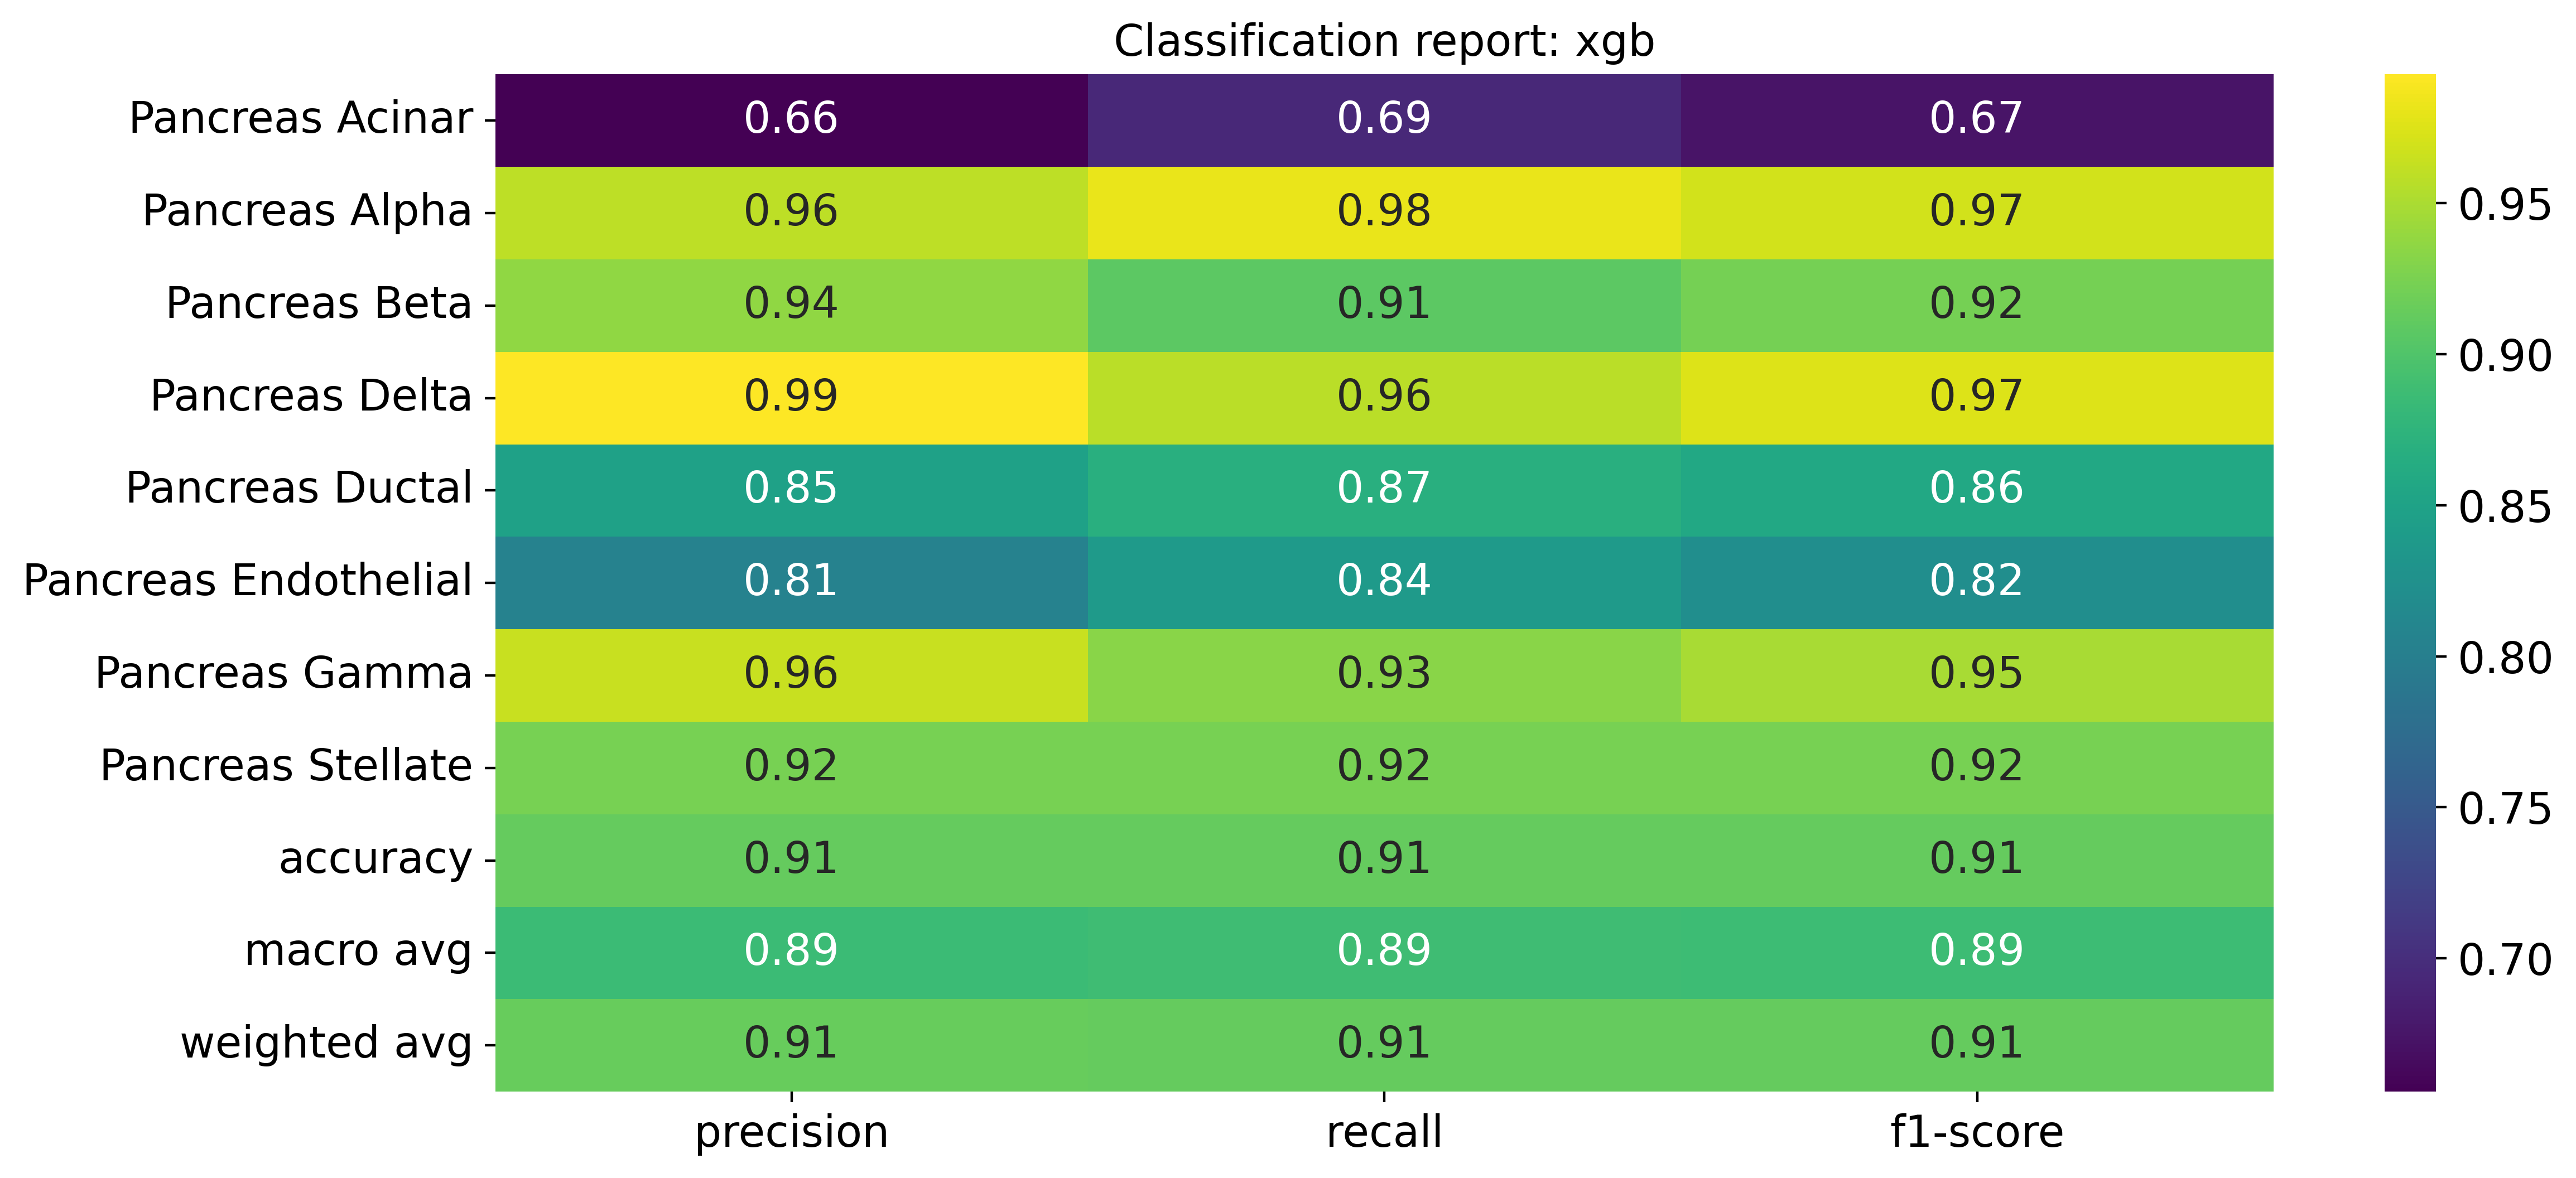

In [8]:
clf = Classifiers(True, False, None, "scVI")
clf.create_classifier(reference_latent, True, "", "cell_type", "classifier_output")

# Predict labels and save to query adata

In [9]:
clf.predict_labels(target_adata, query_latent, "classifier_output/classifier_xgb.ubj", "classifier_output/classifier_encoding.pickle")

target_adata

AnnData object with n_obs × n_vars = 5387 × 1000
    obs: 'batch', 'study', 'cell_type', 'size_factors', '_scvi_batch', '_scvi_labels', 'prediction_xgb'
    uns: '_scvi_uuid', '_scvi_manager_uuid'

In [10]:
target_adata.obs["prediction_xgb"]

index
0-1-0-0-0     Pancreas Alpha
2-1-0-0-0     Pancreas Delta
3-1-0-0-0      Pancreas Beta
4-1-0-0-0    Pancreas Ductal
5-1-0-0-0    Pancreas Ductal
                  ...       
2984-1        Pancreas Gamma
2985-1        Pancreas Alpha
2986-1        Pancreas Delta
2987-1        Pancreas Alpha
2988-1        Pancreas Alpha
Name: prediction_xgb, Length: 5387, dtype: object

In [11]:
target_adata.obs["cell_type"]

index
0-1-0-0-0     Pancreas Alpha
2-1-0-0-0     Pancreas Delta
3-1-0-0-0      Pancreas Beta
4-1-0-0-0    Pancreas Ductal
5-1-0-0-0    Pancreas Ductal
                  ...       
2984-1        Pancreas Gamma
2985-1        Pancreas Alpha
2986-1        Pancreas Delta
2987-1        Pancreas Alpha
2988-1        Pancreas Alpha
Name: cell_type, Length: 5387, dtype: category
Categories (8, object): ['Pancreas Acinar', 'Pancreas Alpha', 'Pancreas Beta', 'Pancreas Delta', 'Pancreas Ductal', 'Pancreas Endothelial', 'Pancreas Gamma', 'Pancreas Stellate']